# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASAMAD\AppData\Local\Temp\ipykernel_11768\1844334635.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


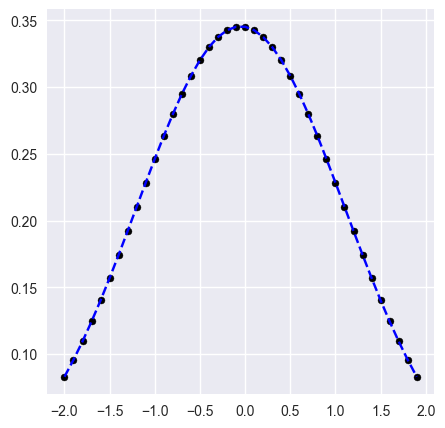

In [2]:
# normal distribution
def pdf(x):
    mean=np.mean(x)
    std = np.std(x)
    y_output = 1/(std*np.sqrt(2*np.pi)) * np.exp(-(x-mean)**2/(2*std**2))
    return y_output


# to generate an array of x
x=np.arange(-2,2,0.1)
y=pdf(x)

# plotting the normal curve/ball curve or   gaussian distribution
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.plot(x,y,color = 'blue',linestyle = 'dashed')

plt.scatter(x,y,marker='o',s=25,color='black')

# Normal Distribution and its tests
1. import dataset
2. subsetting a dataset
3. visual test for normal distribution
    1.Histogram 
    2.qq norm plot
4. statistical dataset
    1.


In [3]:
# Import a dataset
kashti = sns.load_dataset("titanic")
kashti .head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
kashti= kashti[["sex",'age','fare']]
kashti.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


<AxesSubplot: ylabel='Count'>

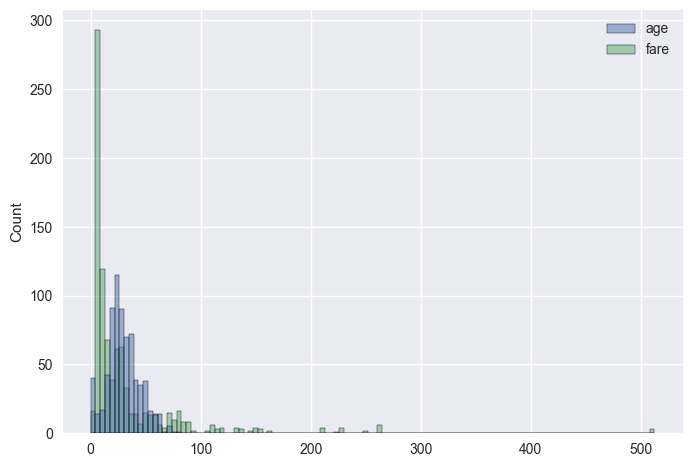

In [5]:
# histogram 
sns.histplot(kashti[['age','fare']])

<AxesSubplot: ylabel='Count'>

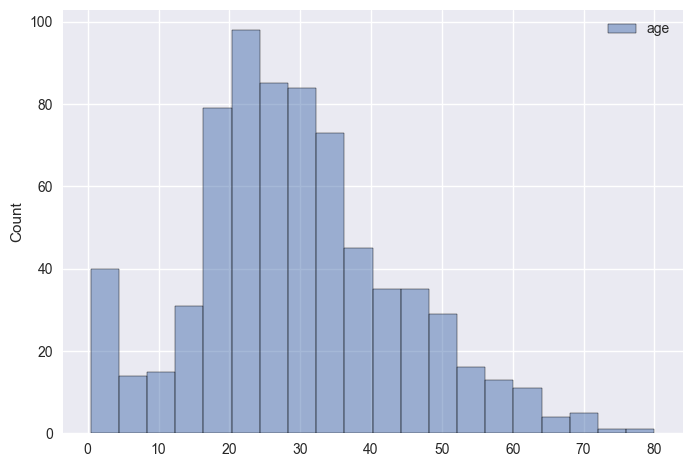

In [6]:
sns.histplot(kashti[["age"]])

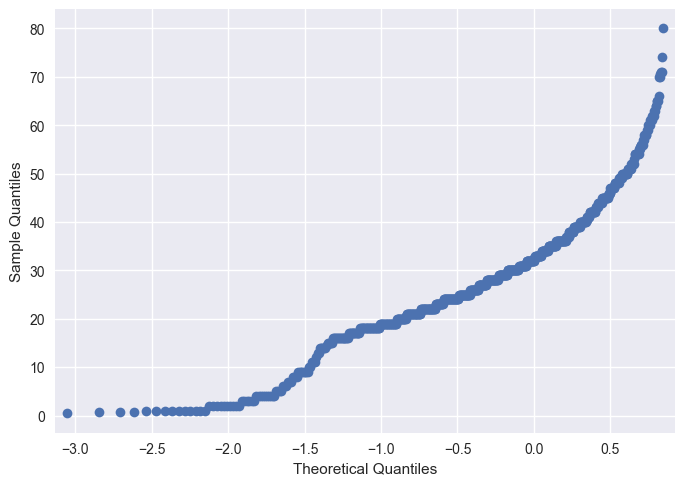

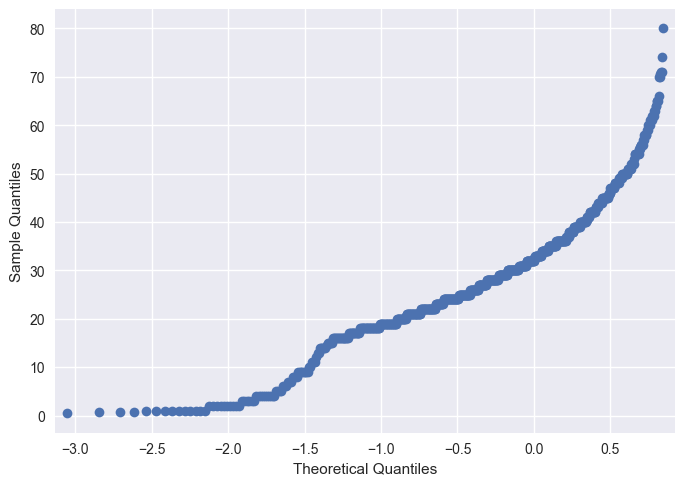

In [7]:
##  qq plot
from statsmodels.graphics.gofplots import qqplot

# q-q norm plot
qqplot(kashti['age'])


# 1. Normality Tests    
    There are many statistical tests that we can use  to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution.
    Each test makes different assumption and considers different aspects of data.
    We will look at 3 most commonly used tests in this section that u can apply to your own data samples.\n
            1.Shapiro-Wilk Test
            2.D'Agostino's k^2 Test
            3.Anderson Darling Test

>**p <= alpha:reject H0, not normal.**\
>**p > alpha:fail to reject H0,normal.**

# 1. Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

### Assumptions

Observations in each sample are independent and identically distributed.
### Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.
Python code is here:

In [8]:
# shapirowilk test

#import library
from scipy.stats import shapiro

stat, p = shapiro(kashti['age'])
print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional argument for further use
if p > 0.05:
	print('Probably Gaussian or Normal Distribution')
else:
	print('Probably not Gaussian nor normal distribution')

stat=nan, p=1.000
Probably Gaussian or Normal Distribution


# 3. Anderson-Darling Test
A statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

## **Assumptions**

- Observations in each sample are independent and identically distributed.
### Interpretation

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

Python code is here:

In [9]:
from scipy.stats import anderson

# select a column to check the normal distribution
result = anderson(kashti["age"])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian/Normal Distribution at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian/Normal Distribution at the %.1f%% level' % (sl))

stat=nan
Probably not Gaussian/Normal Distribution at the 15.0% level
Probably not Gaussian/Normal Distribution at the 10.0% level
Probably not Gaussian/Normal Distribution at the 5.0% level
Probably not Gaussian/Normal Distribution at the 2.5% level
Probably not Gaussian/Normal Distribution at the 1.0% level
